## simple RNN

### 순환신경망
- 활성화 신호가 입력에서 출력으로 한 방향으로 흐르는 피드포워드 신경망
- 순환 신경망은 뒤쪽으로 연결하는 순환 연결이 있음
- 순서가 있는 데이터를 입력으로 받고
- 변화하는 입력에 대한 출력을 얻음

### 메모리셀
- 순환 뉴런의 출력은 이전 시간의 모든 입력에 대한 함수이므로 이를 메모리 형태라고도 함
- 타임스텝에 걸쳐서 어떤 상태를 보존하는 신경망의 구성 요소를 메모리셀이라고 함

### sequence-to-sequence 형태
- 주식가격과 같은 시계열 데이터 예측에 사용
- 최근 N일치의 주식가격을 주입하면 네트워크는 각 입력값보다 하루 앞선 가격을 출력

### sequence-to-vector 형태
- 출력을 시퀀스가 아니라 벡터로 출력
- 영화 리뷰의 연속된 단어의 문장을 이야기하면 평점을 출력

### encoder and decoder
- 변역기와 같은 형태, 한 문장을 이야기하면 다른 문장으로 표현

In [20]:
import tensorflow as tf
import numpy as np

### time stamp 데이터 생성

In [2]:
X = []
Y = []
for i in range(6):
    lst = list(range(i, i+4))

    X.append(list(map(lambda c: [c/10], lst)))
    Y.append((i+4)/10)

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


### simple RNN

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


- input_shape이 4, 1 이라는 것 (timesteps가 4, input_dim이 1)
- units : simpleRNN 레이어에 존재하는 뉴런의 수
- return_sequences는 출력으로 시퀀스 전체를 출력할지 여부

#### fitting

In [11]:
model.fit(X, Y, epochs=100, verbose=0)

#### result

In [12]:
model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]]))

array([[0.76329637]], dtype=float32)

In [13]:
model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]]))

array([[0.3521797]], dtype=float32)

#### 모델을 조금 더 복잡하게

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 4, 10)             120       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 4, 10)             210       
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 4, 10)             210       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 5.8956
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 5.1783
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 4.4874
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 3.8314
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 3.2176
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 2.6525
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 2.1421
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1.6914
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 1.3040
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9811
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7214
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5209
Epoch 13/100
1/1 [==============================] - 0s 7ms/st

In [19]:
model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]]))

array([[0.81308734]], dtype=float32)

#### simple RNN의 단점
- 입력 데이터가 길어지면 학습 능력이 떨어짐 - Long-Term Dependency 문제
- 현재의 답을 얻기 위해 과거의 정보에 의존해야 하는 RNN이지만, 과거 시점이 현재와 너무 멀어지면 문제를 풀기 어려움

---

## LSTM
- simple RNN의 장기 의존성 문제를 해결하기 위한 알고리즘
- 1997년 Hochreiter & Schmidhuber에 의해 소개됨
- time step을 가로지르며 셀 상태가 보존
- 모델을 명시적으로 나열한 개념

### LSTM의 핵심 아이디어 cell state
- cell state를 제어하는 gate
- forget gate
- input gate
- update cell state
- output gate

In [9]:
X = []
Y = []
for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.73169845]
 [0.         0.95958794]
 [0.         0.36227795]
 [0.         0.02256709]
 [0.         0.57186375]
 [0.         0.10081643]
 [0.         0.17228661]
 [0.         0.67154884]
 [0.         0.6177625 ]
 [0.         0.55382025]
 [0.         0.01516673]
 [0.         0.75626175]
 [0.         0.67194375]
 [0.         0.85870423]
 [0.         0.93191397]
 [0.         0.71270988]
 [0.         0.14793304]
 [0.         0.8655764 ]
 [0.         0.13329549]
 [0.         0.17556943]
 [0.         0.11818499]
 [0.         0.23821618]
 [0.         0.83584018]
 [0.         0.51448125]
 [0.         0.21231686]
 [0.         0.84180169]
 [0.         0.5863855 ]
 [0.         0.66303367]
 [0.         0.22830239]
 [0.         0.22439196]
 [0.         0.41999987]
 [0.         0.5783703 ]
 [0.         0.98002397]
 [0.         0.43670646]
 [0.         0.38761759]
 [0.         0.15817795]
 [0.         0.7806527 ]
 [0.         0.75159212]
 [0.         0.22446076]
 [0.         0.37839986]


- LSTM을 처음 제안한 논문에서 LSTM의 성능을 확인하기 위해 제시한 문제

### Using RNN

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100, 30)           990       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 20ms/step - loss: 0.0655 - val_loss: 0.0477
Epoch 2/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0540 - val_loss: 0.0517
Epoch 3/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0533 - val_loss: 0.0467
Epoch 4/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0539 - val_loss: 0.0467
Epoch 5/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0536 - val_loss: 0.0470
Epoch 6/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0527 - val_loss: 0.0468
Epoch 7/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0537 - val_loss: 0.0469
Epoch 8/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0549 - val_loss: 0.0476
Epoch 9/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0526 - val_loss: 0.0506
Epoch 10/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0536 - val_loss: 0.0473

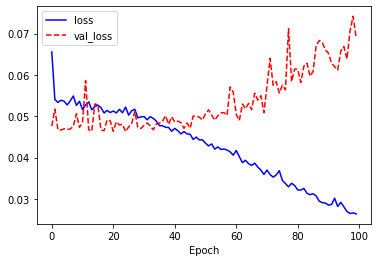

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- 과적합이 심함

### LSTM

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 30)           3960      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [20]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 39ms/step - loss: 0.0573 - val_loss: 0.0459
Epoch 2/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0522 - val_loss: 0.0459
Epoch 3/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0523 - val_loss: 0.0497
Epoch 4/100
64/64 [==============================] - 2s 32ms/step - loss: 0.0521 - val_loss: 0.0479
Epoch 5/100
64/64 [==============================] - 2s 32ms/step - loss: 0.0522 - val_loss: 0.0464
Epoch 6/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0528 - val_loss: 0.0483
Epoch 7/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0523 - val_loss: 0.0464
Epoch 8/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0522 - val_loss: 0.0466
Epoch 9/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0519 - val_loss: 0.0456
Epoch 10/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0520 - val_loss: 0.0460

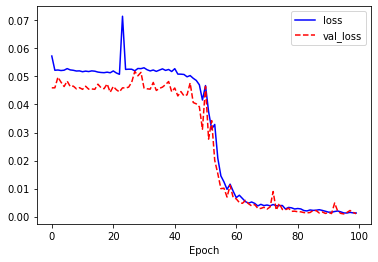

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- 잘 fitting 됨

---

## 감성분석 - Sentiment Analysis
- 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제
- 이중 문장의 긍정/부정 등을 구분하는 경우가 많음

In [23]:
path_to_train_file = 'C:/Users/seonwook/nsmc/ratings_train.txt'
path_to_test_file = 'C:/Users/seonwook/nsmc/ratings_test.txt'

In [24]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [25]:
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

print(train_text[:300])

Length of text: 7087272 characters
Length of text: 2368261 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797


In [26]:
train_text[:300]

'id\tdocument\tlabel\r\n9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\r\n3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\r\n10265843\t너무재밓었다그래서보는것을추천한다\t0\r\n9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\r\n6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1\r\n5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0\r\n7797'

In [27]:
train_text.split('\n')

['id\tdocument\tlabel\r',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\r',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\r',
 '10265843\t너무재밓었다그래서보는것을추천한다\t0\r',
 '9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\r',
 '6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1\r',
 '5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0\r',
 '7797314\t원작의 긴장감을 제대로 살려내지못했다.\t0\r',
 '9443947\t별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네\t0\r',
 '7156791\t액션이 없는데도 재미 있는 몇안되는 영화\t1\r',
 '5912145\t왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?\t1\r',
 '9008700\t걍인피니트가짱이다.진짜짱이다♥\t1\r',
 '10217543\t볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~\t1\r',
 '5957425\t울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해\t0\r',
 '8628627\t담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.\t1\r',
 '9864035\t취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지\t0\r',
 '6852435\tㄱ냥 매번 긴장되고 재밋음ㅠㅠ\t1\r',
 '9143163\t참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 

In [28]:
train_text.split('\n')[:3]

['id\tdocument\tlabel\r',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\r',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\r']

In [29]:
train_text.split('\n')[3]

'10265843\t너무재밓었다그래서보는것을추천한다\t0\r'

In [30]:
train_text.split('\n')[3].split('\t')

['10265843', '너무재밓었다그래서보는것을추천한다', '0\r']

In [31]:
import numpy as np

train_Y = np.array([[int(row.split('\t')[2])]
                    for row in train_text.split('\n')[1:] if row.count('\t') > 0])

test_Y = np.array([[int(row.split('\t')[2])]
                    for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


### tokenization and cleaning
- tokenization : 자연어를 처리 가능한 최소의 단위로 나누는 것으로 여기서는 띄어쓰기로 하자
- cleaning은 불필요한 기호를 제거하는 것

In [32]:
# cleaning
import re

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(), !?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'{2,}", "\'",  string)
    string = re.sub(r"\'", "", string)

    return string.lower()

In [33]:
# train set cleaning
train_text_X = [row.split('\t')[1]
                for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


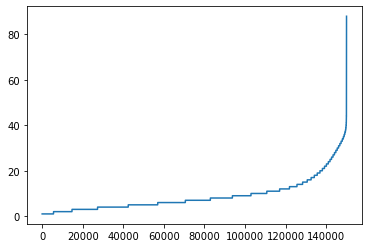

142587


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

### 데이터 크기 맞추기
- 학습을 위해 네트워크에 입력을 넣을때 입력 데이터는 그 크기가 같아야 한다
- 입력 벡터의 크기를 맞춰야 함
- 긴 문장은 줄이고, 짧은 문장은 공백으로 채움
- 15만개의 문장 중에 대부분이 40단어 이하로 되어 있음

In [35]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])

sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


### 토크나이징과 패딩

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [37]:
# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 300)           6000000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


### 임베딩 레이어
- 임베딩 레이어 Embedding Layer : 자연어를 수치화된 정보로 바꾸기 위한 레이어
- 자연어는 시간의 흐름에 따라 정보가 연속적으로 이어지는 시퀀스 데이터
- 영어는 문자 단위, 한글은 문자를 넘어 자소 단위로도 쪼개기도 함. 혹은 띄어쓰기나 형태소로 나누기도 함
- 여러 단어로 묶어서 사용하는 n-gram 방식도 있음
- 여기에 원-핫 인코딩까지 포함

In [38]:
# 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128,
                    validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 51s 53ms/step - loss: 0.4364 - accuracy: 0.7819 - val_loss: 0.4021 - val_accuracy: 0.8061
Epoch 2/5
938/938 [==============================] - 48s 52ms/step - loss: 0.3246 - accuracy: 0.8469 - val_loss: 0.3850 - val_accuracy: 0.8232
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2717 - accuracy: 0.8685 - val_loss: 0.4117 - val_accuracy: 0.8181
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.2290 - accuracy: 0.8877 - val_loss: 0.4737 - val_accuracy: 0.8083
Epoch 5/5
938/938 [==============================] - 50s 53ms/step - loss: 0.1946 - accuracy: 0.9032 - val_loss: 0.5418 - val_accuracy: 0.8078


In [39]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.3982162 0.6017839]
['재미있을', '줄']
[0.35439757 0.6456024 ]
['재미있을', '줄', '알았는데']
[0.35353437 0.64646566]
['재미있을', '줄', '알았는데', '완전']
[0.35485506 0.64514494]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.35485506 0.64514494]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.38549602 0.614504  ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9520805  0.04791946]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9972783  0.00272177]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9972783  0.00272177]
